# __Lending Club Case Study__

Project Description
A consumer finance company who provides loans to customers wishes to identify those loan applicants  

who pose a risk in terms of defaulting. In order to do this we will use data about past loan applicants 

and focus on those who have defaulted on those past loans. It will be necessary to understand the driving 

factors behind default so that the company may use the knowledge gained to reduce risk in their lending going forward. 







## __Project Plan__:

###   __Part 1: Data Understanding__

        1. Load the Libraries
        2. Load the data

### __Part 2: Data Cleaning and Manipulation__

        2. Explore and clean the data
        3. Address missing data and outliers
        4. Convert data to suitable/correct format

### __Part 3: Data Analysis__

        5. Perform Univariate and Segmented Univariate Analysis
        6. Create Business-driven, type-driven, and data-driven metrics for important variables
        7. Perform Bivariate analysis to identify combinations of driver variables
        8. Create appropriate plots

### __Part 4: Presentation and Recommendations__

        9. Clear and Concise
        10. Realistic recommendations
        11. Upload files

#### Part 1:  Data Understanding

#### Load the Libraries and the Data

In [159]:
# Loading the Libraries

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Library to Suppress Warnings

import warnings
warnings.filterwarnings('ignore')


In [160]:
# Loading the Data Set

data = pd.read_csv(r'C:\Users\Chris\MSc Data Science ML AI\2_Data Toolkit\LendingClubCaseStudy\loan.csv', header=0)

# Copying the Data to Another Variable to Avoid Modifiying the Original Dataset

df = data.copy()


In [161]:
# Check the Data Types

df.dtypes


 id                             int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [162]:
#How Much of Each Data Type is Present

df.dtypes.value_counts()

float64    74
object     24
int64      13
dtype: int64

In [163]:
# What are the Column Names

df.columns


Index([' id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [164]:
# What is the shape of the DataFrame

df.shape


(39717, 111)

#### There are 39,717 Rows and 111 Columns

In [165]:
# What does the data look like

df.info


<bound method DataFrame.info of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   

### Some of the above displayed columns will require their data types to be chnaged so that the analysis can be performed on them.

### Next We Will check for Missing Values With the Help of A Function.

In [166]:
# This function will go through the columns individually
# and count the number of null values, then calculate the percentage that are null, 
# and finally return those percentages along with the total missing.

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check(df)

,Total,Percent
verification_status_joint,39717,1.0
annual_inc_joint,39717,1.0
mo_sin_old_rev_tl_op,39717,1.0
mo_sin_old_il_acct,39717,1.0
bc_util,39717,1.0
...,...,...
delinq_amnt,0,0.0
policy_code,0,0.0
earliest_cr_line,0,0.0
delinq_2yrs,0,0.0


### There are many columns where there is no data present. The next step will be to drop, or remove, those columns.

In [167]:
# Drop the columns with no values and create a new dataframe.

df_drop_columns = df.dropna(axis=1, how='all')


In [168]:
# View the first few rows of the new data frame.

df_drop_columns.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,13-Sep,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,16-Apr,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,16-Jun,16-May,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [169]:
# Create a new data frame so that the previous one is unaffected by future operations.

df2 = df_drop_columns


In [170]:
# Run the missing value check function again on the new data frame and compare to the previous one.

def missing_check_dropped(df2):
    total = df2.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df2.isnull().sum()/df2.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check_dropped(df2)



,Total,Percent
next_pymnt_d,38577,0.971297
mths_since_last_record,36931,0.929854
mths_since_last_delinq,25682,0.646625
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
chargeoff_within_12_mths,56,0.001410
collections_12_mths_ex_med,56,0.001410


In [171]:
# Now let us view the shape of df2 after dropping columns wit no data.

df2.shape


(39717, 57)

### Here we can see that the number of rows is unchanged, but the number of columns has dropped from 111 to 57.

In [172]:
# In the table of missing data above, we can see that the first three columns listed show significant amounts of data missing. 
# As a result these columns will not be helpful in the analysis. The percentage of missing data is 65%, 93% and 97%.

df3 = df2.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq'], axis=1)



In [173]:
# Let us now again view the shape of the data frame.

df3.shape


(39717, 54)

### The number of columns has now reduced to 54. The number of rows is unchanged.

In [174]:
# Let us now review again the total and percentage of missing data
# associated with each column.

def missing_check_dropped(df3):
    total = df3.isnull().sum().sort_values(ascending=False) # total number of null values
    percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False) #percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # putting the above two together
    return missing_data # return the dataframe

missing_check_dropped(df3)


,Total,Percent
desc,12940,0.325805
emp_title,2459,0.061913
emp_length,1075,0.027066
pub_rec_bankruptcies,697,0.017549
last_pymnt_d,71,0.001788
collections_12_mths_ex_med,56,0.001410
chargeoff_within_12_mths,56,0.001410
revol_util,50,0.001259
tax_liens,39,0.000982
title,11,0.000277


### As we can see form the above table, the highest percentage of missing data in any column is 32%. The remaining columns should help with the analysis.

In [175]:
# Now let us look at the type of data in each column and determine if 
# the format in each is correct. If it is not correct it must be converted.

df3.dtypes


 id                             int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

### Some of the columns need to b e converted to datetime and some to float or integer.

In [176]:
df3['term'] = df3['term'].str[:2]
df3['int_rate'] = df3['int_rate'].str[:-1]

In [177]:
df3['term'] = pd.to_numeric(df3['term'])

In [178]:
df3['int_rate'] = pd.to_numeric(df3['int_rate'])

In [179]:
df4 = df3.drop(['emp_title'], axis=1)

In [180]:
df4['emp_length'] = df4.emp_length.str.extract('(\d+)')

In [181]:
df4['emp_length'] = pd.to_numeric(df4['emp_length'])

In [182]:
df4['issue_d']  = pd.to_datetime(df4['issue_d'], errors = 'coerce')

In [183]:
df4['earliest_cr_line']  = pd.to_datetime(df4['earliest_cr_line'], errors = 'coerce')

In [184]:
df5 = df4.drop(labels=['url', 'desc', 'purpose', 'title'], axis=1)

In [185]:
df5['revol_util'] = df5['revol_util'].str[:-1]
df5['revol_util'] = pd.to_numeric(df5['revol_util'])

In [186]:
df5['last_pymnt_d'] = pd.to_datetime(df5['last_pymnt_d'], errors='coerce')

In [187]:
df5['last_credit_pull_d'] = pd.to_datetime(df5['last_credit_pull_d'], errors='coerce')

### The following table shows the results of coverting column data to the correct format.

In [188]:
df5.dtypes

 id                                    int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                   int64
int_rate                             float64
installment                          float64
grade                                 object
sub_grade                             object
emp_length                           float64
home_ownership                        object
annual_inc                           float64
verification_status                   object
issue_d                       datetime64[ns]
loan_status                           object
pymnt_plan                            object
zip_code                              object
addr_state                            object
dti                                  float64
delinq_2yrs                            int64
earliest_cr_line              datetime64[ns]
inq_last_6

## Identify Risky Loan Applicants

#### Risky loan applicants would be those who are borrowers who default on on their loans. They cause the largest amount of loss to the lenders. The customers labeled as charged-off are the defaulters. Identify the risky loan applicants (showing charged-off). This is the aim of this case study. Once the risky loan applicants are identified, help the company understand the driving factors, or variables, behind loan default. 

#### Let us begin by creating a new data frame containing all the columns in the remaining dataframe that will help in our analysis.

In [189]:
# Firstly, what are the total counts for the different status'.

df5['loan_status'].value_counts()


Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [190]:
# Let us create a new data frame showing the loan status column with the other columns.

df6 = df5.filter(['member_id', 'loan_status', 'loan_amnt', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 'purpose',
                   'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'out_prncp'])

df6

,member_id,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
0,1296599,Fully Paid,5000,B,10.0,RENT,24000.0,Verified,n,AZ,27.65,0,3,0,83.7,9,0.00
1,1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.00
2,1313524,Fully Paid,2400,C,10.0,RENT,12252.0,Not Verified,n,IL,8.72,0,2,0,98.5,10,0.00
3,1277178,Fully Paid,10000,C,10.0,RENT,49200.0,Source Verified,n,CA,20.00,0,10,0,21.0,37,0.00
4,1311748,Current,3000,B,1.0,RENT,80000.0,Source Verified,n,OR,17.94,0,15,0,53.9,38,524.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92174,Fully Paid,2500,A,4.0,MORTGAGE,110000.0,Not Verified,n,CO,11.33,0,13,0,13.1,40,0.00
39713,90607,Fully Paid,8500,C,3.0,RENT,18000.0,Not Verified,n,NC,6.40,1,6,0,26.9,9,0.00
39714,90390,Fully Paid,5000,A,1.0,MORTGAGE,100000.0,Not Verified,n,MA,2.30,0,11,0,19.4,20,0.00
39715,89243,Fully Paid,5000,A,1.0,MORTGAGE,200000.0,Not Verified,n,MD,3.72,0,17,0,0.7,26,0.00


### Create a dataframe of the above table for 'charged off' only.

In [191]:
# Copy the data frame to eep the previous data frame unaltered.

df7 = pd.DataFrame(df6)


In [192]:
# Next let us create a dew data frame with only those customers who have defaulted on a previous loan.

df8 = df7.loc[df7['loan_status'] == 'Charged Off']
df8


,member_id,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
1,1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.0
8,1306957,Charged Off,5600,F,4.0,OWN,40000.0,Source Verified,n,CA,5.55,0,11,0,32.6,13,0.0
9,1306721,Charged Off,5375,B,1.0,RENT,15000.0,Verified,n,TX,18.08,0,2,0,36.5,3,0.0
12,1298717,Charged Off,9000,C,1.0,RENT,30000.0,Source Verified,n,VA,10.08,0,4,0,91.7,9,0.0
14,1303503,Charged Off,10000,B,3.0,RENT,100000.0,Source Verified,n,CA,7.06,0,14,0,55.5,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118026,Charged Off,2500,D,1.0,MORTGAGE,32000.0,Not Verified,n,NE,20.00,0,11,0,35.1,32,0.0
39668,117783,Charged Off,2500,B,1.0,MORTGAGE,75000.0,Not Verified,n,NE,20.00,0,9,0,3.8,35,0.0
39669,118519,Charged Off,6500,F,9.0,MORTGAGE,213000.0,Not Verified,n,GA,6.45,0,11,0,75.3,28,0.0
39678,113093,Charged Off,1000,C,2.0,MORTGAGE,33990.0,Not Verified,n,VA,14.47,0,9,0,36.9,11,0.0


## Univariate Analysis
### Two types should be analysed: Numerical and Categorical

##### Numerical Univariate Analysis

In [193]:
# The next step is to create a set of histograms for each column. 
# Each Histogram will show the frequency of the various columns'
# numerical data.

In [194]:

df8.set_index('member_id')


,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
member_id,,,,,,,,,,,,,,,,
1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.0
1306957,Charged Off,5600,F,4.0,OWN,40000.0,Source Verified,n,CA,5.55,0,11,0,32.6,13,0.0
1306721,Charged Off,5375,B,1.0,RENT,15000.0,Verified,n,TX,18.08,0,2,0,36.5,3,0.0
1298717,Charged Off,9000,C,1.0,RENT,30000.0,Source Verified,n,VA,10.08,0,4,0,91.7,9,0.0
1303503,Charged Off,10000,B,3.0,RENT,100000.0,Source Verified,n,CA,7.06,0,14,0,55.5,29,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118026,Charged Off,2500,D,1.0,MORTGAGE,32000.0,Not Verified,n,NE,20.00,0,11,0,35.1,32,0.0
117783,Charged Off,2500,B,1.0,MORTGAGE,75000.0,Not Verified,n,NE,20.00,0,9,0,3.8,35,0.0
118519,Charged Off,6500,F,9.0,MORTGAGE,213000.0,Not Verified,n,GA,6.45,0,11,0,75.3,28,0.0


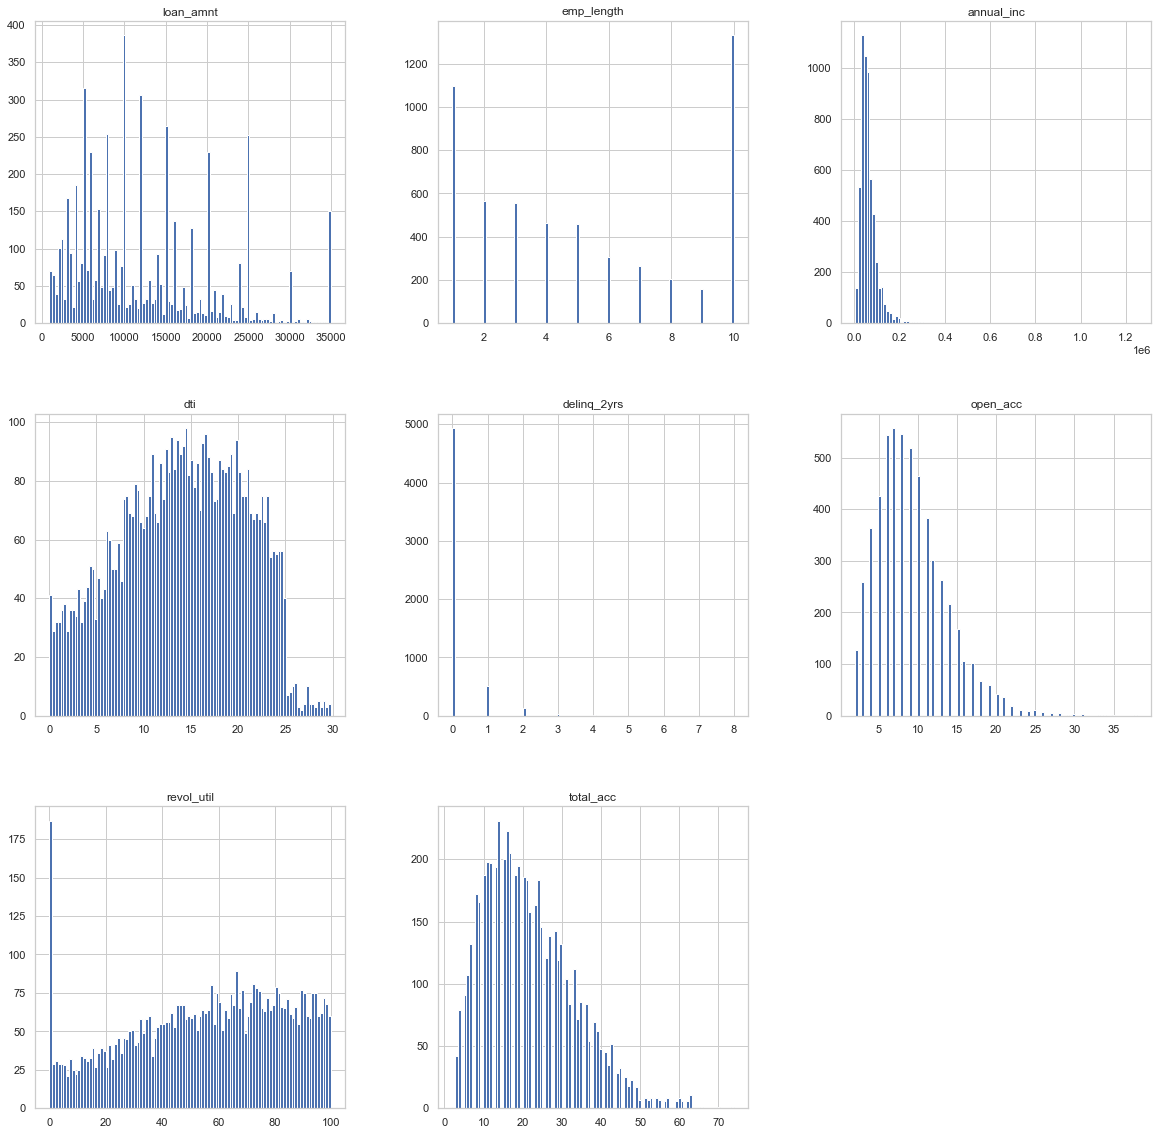

In [195]:
# Next Create the Histograms
# But first remove 'pub_rec' and 'out_prncp' columns from plot as they provide no insight.
# These plots show the variables in the context of 'charged off' (defaulters).

df8.hist(column = ['loan_status', 'loan_amnt', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'pymnt_plan', 
                   'addr_state', 'dti', 'delinq_2yrs', 'open_acc', 'revol_util', 'total_acc'], figsize=(20,20), bins=100);


# __Observations of Results of Numerical Univariate Analysis in the context of Defaulters__

#### Loan Amount:
* Most loan amounts for defaulters are in the 10K range.
* There is a spike in defaults at every 5-10k increase in loan amount.
* Far fewer defaulters had borrowed above 25k.

#### Employment Length:
* With the exception of those who had been in employment 10 years most defaulters had been employed less than 1 year.
* The number of defaulters decreases as the number of years in employment increases.

#### Annual Income: 
* Most defaulters were those whose income was at the lower end of the scale.

#### Debt-to-Income (dti)
* Most defaulters had a dti ratio of approximateley 14%
* As dti reduces the number of defaulters typically reduces.
* Above 25% there appear to be fewer defaulters. This could be an anomoly.

#### Delinquent 2 Years (delinq_2yrs)
* Most defaulters did not previously have a loan defaults in the previous 2 years.

#### Number of Open Credit Lines
* Most defaulters have in the range of 8 open credit lines.
* There are fewer defaulters with lower numbers of open credit lines.

#### Amount of Revolving Credit to All Revolving
* As the percentage of credit line utilization increases the number of loan defaulters increases.
* The lowest numbers of defaulters have a utilization below 20%.

#### Total Number of Credit Lines Currently in Defaulters Credit File
* Most defaulters already have approximateley 17 Credit Lines already.
* The number of defaulters reduces quickly either side of the 17 credit lines peak.

##### __Categorical Univariate Analysis__

In [196]:
# Now let us create bar plots of the categorical variables
# Which are categorical variables? See the first five rows of the latest datafrema 8

data = df8
data.head()


,member_id,loan_status,loan_amnt,grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
1,1314167,Charged Off,2500,C,1.0,RENT,30000.0,Source Verified,n,GA,1.00,0,3,0,9.4,4,0.0
8,1306957,Charged Off,5600,F,4.0,OWN,40000.0,Source Verified,n,CA,5.55,0,11,0,32.6,13,0.0
9,1306721,Charged Off,5375,B,1.0,RENT,15000.0,Verified,n,TX,18.08,0,2,0,36.5,3,0.0
12,1298717,Charged Off,9000,C,1.0,RENT,30000.0,Source Verified,n,VA,10.08,0,4,0,91.7,9,0.0
14,1303503,Charged Off,10000,B,3.0,RENT,100000.0,Source Verified,n,CA,7.06,0,14,0,55.5,29,0.0


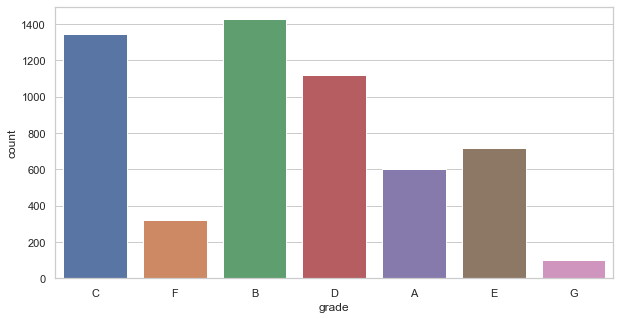

In [197]:
# First plot shows Loan Grade and Number of Defaulters

plt.figure(figsize=(10,5))
sns.countplot(x='grade', data=data);


#### Observations
* Obs
* Obs
* Obs

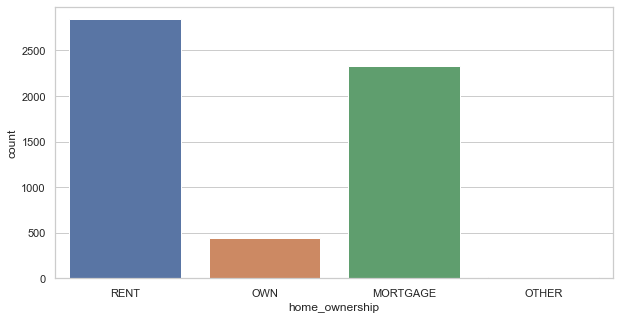

In [198]:
# This next plot shows home ownership status of defaulters.

plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership', data=data);


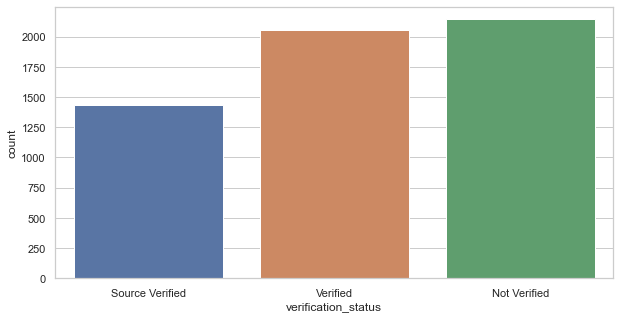

In [199]:
# This plot shows Verified versus Not Verified defaulters

plt.figure(figsize=(10,5))
sns.countplot(x='verification_status', data=data);


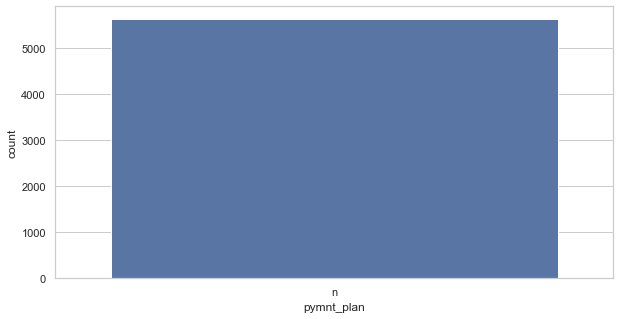

In [200]:
# This plot shows the number of defaulters who had a payment plan, versus none.

plt.figure(figsize=(10,5))
sns.countplot(x='pymnt_plan', data=data);


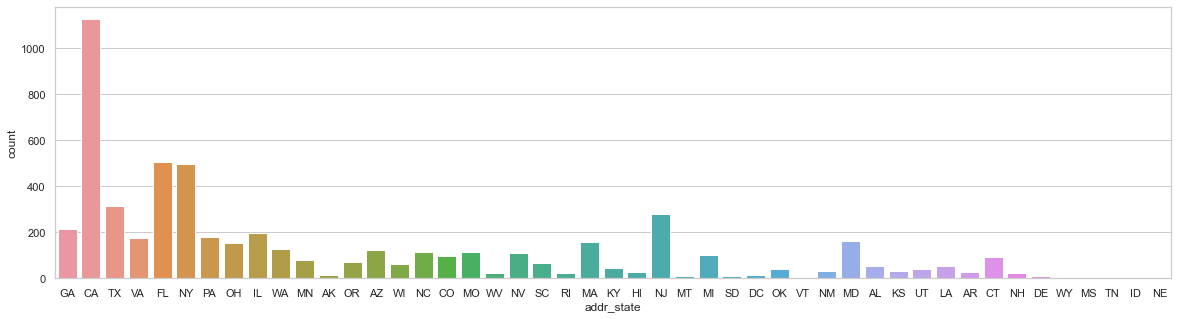

In [201]:
# This plot shows the number of defaulters in each state.

plt.figure(figsize=(20,5))
sns.countplot(x='addr_state', data=data);


In [202]:
# Next let us create the Correlation map, starting with the correlation table

corr = df8.corr()
corr


,member_id,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc,out_prncp
member_id,1.000000,0.148485,0.111364,-0.013352,0.111183,0.002918,0.012821,-0.039820,0.105831,0.031458,NaN
loan_amnt,0.148485,1.000000,0.191467,0.352359,0.063872,-0.029843,0.184323,-0.047690,0.042634,0.283738,NaN
emp_length,0.111364,0.191467,1.000000,0.134728,0.056225,0.012410,0.096169,0.062003,0.036581,0.181730,NaN
annual_inc,-0.013352,0.352359,0.134728,1.000000,-0.089725,0.021765,0.212320,-0.006679,0.071373,0.287343,NaN
dti,0.111183,0.063872,0.056225,-0.089725,1.000000,-0.068839,0.299230,0.007990,0.227279,0.272802,NaN
delinq_2yrs,0.002918,-0.029843,0.012410,0.021765,-0.068839,1.000000,-0.018495,-0.001608,-0.101581,0.059658,NaN
open_acc,0.012821,0.184323,0.096169,0.212320,0.299230,-0.018495,1.000000,0.049776,-0.056673,0.686425,NaN
pub_rec,-0.039820,-0.047690,0.062003,-0.006679,0.007990,-0.001608,0.049776,1.000000,0.058880,0.016300,NaN
revol_util,0.105831,0.042634,0.036581,0.071373,0.227279,-0.101581,-0.056673,0.058880,1.000000,-0.023342,NaN
total_acc,0.031458,0.283738,0.181730,0.287343,0.272802,0.059658,0.686425,0.016300,-0.023342,1.000000,NaN


In [203]:
# Remove the rows and columns in the corr table that are NaN or not required

corr_removed = df8.drop(['out_prncp', 'member_id'], axis=1)
corr_table = corr_removed.corr()
corr_table


,loan_amnt,emp_length,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_util,total_acc
loan_amnt,1.000000,0.191467,0.352359,0.063872,-0.029843,0.184323,-0.047690,0.042634,0.283738
emp_length,0.191467,1.000000,0.134728,0.056225,0.012410,0.096169,0.062003,0.036581,0.181730
annual_inc,0.352359,0.134728,1.000000,-0.089725,0.021765,0.212320,-0.006679,0.071373,0.287343
dti,0.063872,0.056225,-0.089725,1.000000,-0.068839,0.299230,0.007990,0.227279,0.272802
delinq_2yrs,-0.029843,0.012410,0.021765,-0.068839,1.000000,-0.018495,-0.001608,-0.101581,0.059658
open_acc,0.184323,0.096169,0.212320,0.299230,-0.018495,1.000000,0.049776,-0.056673,0.686425
pub_rec,-0.047690,0.062003,-0.006679,0.007990,-0.001608,0.049776,1.000000,0.058880,0.016300
revol_util,0.042634,0.036581,0.071373,0.227279,-0.101581,-0.056673,0.058880,1.000000,-0.023342
total_acc,0.283738,0.181730,0.287343,0.272802,0.059658,0.686425,0.016300,-0.023342,1.000000


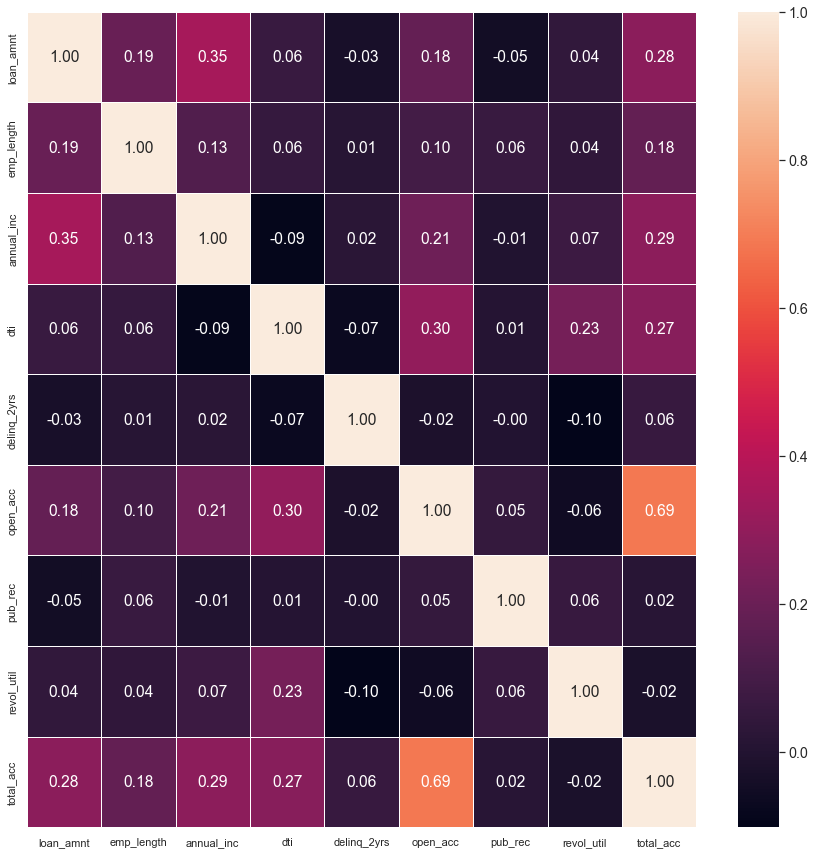

In [204]:
# Create the correlation map and add some edits for improvement.

f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.3)
sns.heatmap(corr_table, annot=True, fmt='.2f', linewidth=.5);


# __Results Analysis__